In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
def fetch_arxiv_papers(query, max_results=20):
    """
    Fetches research papers from arXiv.org based on a query.
    """
    base_url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": f"all:{query}",
        "start": 0,
        "max_results": max_results,
        "sortBy": "relevance",
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code != 200:
        print(f"Failed to fetch data: {response.status_code}")
        return []
    
    soup = BeautifulSoup(response.content, "xml")
    papers = []
    
    for entry in soup.find_all("entry"):
        title = entry.title.text.strip()
        summary = entry.summary.text.strip()
        link = entry.id.text.strip()
        authors = [author.find("name").text for author in entry.find_all("author")]
        year = entry.published.text.strip().split("-")[0]
    
        papers.append({
            "Title": title,
            "Summary": summary,
            "Authors": ", ".join(authors),
            "Link": link,
            "Year": year
        })
    
    return papers


In [9]:
def output(query, fn):    
    papers = fn(query)

    # Save to CSV
    df = pd.DataFrame(papers)
    df.to_csv(f"{query.lower().replace(' ', '_')}_papers.csv", index=False)
    print(f"Saved {len(papers)} papers to {query.lower().replace(' ', '_')}_papers.csv")
output("Fall Detection AI", fetch_arxiv_papers)

Saved 20 papers to fall_detection_ai_papers.csv


In [4]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}

list_of_requests = []
url = 'https://www.google.com/search?q=bed+detection+sensory+products&sca_esv=2d3bc29d0d885816&biw=1022&bih=471&tbm=shop&sxsrf=ADLYWIIszWVu_n7SUqCQwP9Om99cwdOPhg%3A1736300653584&ei=bdh9Z9qQI7_G4-EP3KamiQI&ved=0ahUKEwia-7f9_-SKAxU_4zgGHVyTKSEQ4dUDCAg&uact=5&oq=bed+detection+sensory+products&gs_lp=Egtwcm9kdWN0cy1jYyIeYmVkIGRldGVjdGlvbiBzZW5zb3J5IHByb2R1Y3RzSPY2UABY9zVwBHgAkAEAmAFLoAHrDKoBAjMzuAEDyAEA-AEBmAIXoAKFCKgCAcICBxAjGCcY6gLCAgoQABiABBhDGIoFwgIFEAAYgATCAgQQIxgnwgIHEAAYgAQYCsICBxAAGIAEGA3CAgYQABgWGB7CAgsQABjWBRgKGA0YHsICCRAAGNYFGA0YHsICCxAAGAUY1gUYDRgewgILEAAY1gUYCBgNGB7CAgQQIRgKmAMKkgcCMjOgB-RM&sclient=products-cc'

page = requests.get(url, headers=headers)

In [75]:
page.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=bed+detection+sensory+products&amp;sca_esv=2d3bc29d0d885816&amp;biw=1022&amp;bih=471&amp;tbm=shop&amp;sxsrf=ADLYWIIszWVu_n7SUqCQwP9Om99cwdOPhg%3A1736300653584&amp;ei=bdh9Z9qQI7_G4-EP3KamiQI&amp;ved=0ahUKEwia-7f9_-SKAxU_4zgGHVyTKSEQ4dUDCAg&amp;uact=5&amp;oq=bed+detection+sensory+products&amp;gs_lp=Egtwcm9kdWN0cy1jYyIeYmVkIGRldGVjdGlvbiBzZW5zb3J5IHByb2R1Y3RzSPY2UABY9zVwBHgAkAEAmAFLoAHrDKoBAjMzuAEDyAEA-AEBmAIXoAKFCKgCAcICBxAjGCcY6gLCAgoQABiABBhDGIoFwgIFEAAYgATCAgQQIxgnwgIHEAAYgAQYCsICBxAAGIAEGA3CAgYQABgWGB7CAgsQABjWBRgKGA0YHsICCRAAGNYFGA0YHsICCxAAGAUY1gUYDRgewgILEAAY1gUYCBgNGB7CAgQQIRgKmAMKkgcCMjOgB-RM&amp;sclient=products-cc</title></head>\n<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px; overscr

In [72]:
product_soup = BeautifulSoup(page.text, 'html.parser')
# find all <a> where there exists child <h3>
product_names = []
product_links = []
print(f'a_tag: {product_soup.find_all("a")}')
for a_tag in product_soup.find_all('a'):
    h3_tag = a_tag.find('h3')
    if h3_tag:
        product_name = h3_tag.text
        product_link = a_tag['href']
        print(f'Product Name: {product_name}')
        print(f'Product Link: {product_link}')
        product_names.append(product_name)
        product_links.append(product_link)
product_df = pd.DataFrame({
    'Product Name': product_names,
    'Product Link': product_links
})
product_df.to_csv(f"products.csv", index=False)
print(f"Saved to products.csv")

a_tag: [<a href="#" onclick="document.getElementById('infoDiv').style.display='block';">Why did this happen?</a>, <a href="//www.google.com/policies/terms/">Terms of Service</a>, <a href="//support.google.com/websearch/answer/86640">Learn more</a>]
Saved to products.csv


'<!doctype html><html itemscope="" itemtype="http://schema.org/Product" lang="en-SG"> <style>.vqqGxe a,.vqqGxe a:active,.vqqGxe a:hover,.vqqGxe a:link,.vqqGxe a:visited{color:#0b57d0;text-decoration:underline}.vqqGxe#vqqGxe{margin:0 38px;max-width:1024px}.LZ18Oc{display:flex;max-width:100%;border-bottom:solid 1px #ebebeb;margin-bottom:24px;padding:16px 20px 16px 38px}.LZ18Oc .sl2Sj{margin-right:38px;min-width:max-content;flex-shrink:0;color:#80868b;display:block;font-size:15px;font-weight:500;line-height:20px;padding-top:14px}.LZ18Oc .QnoD0e{flex:1 0 auto;width:0}.gb_x{display:-webkit-box;display:-webkit-flex;display:-webkit-box;display:-webkit-flex;display:flex;-webkit-box-pack:end;-webkit-justify-content:flex-end;-webkit-justify-content:flex-end;justify-content:flex-end;width:100%}.gb_y{-webkit-box-sizing:border-box;box-sizing:border-box;height:48px;padding:4px}.gb_z,.gb_A,.gb_B{-webkit-tap-highlight-color:transparent;-webkit-box-sizing:border-box;box-sizing:border-box;float:right;ou
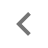
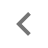
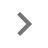
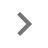
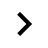
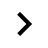

In [5]:
lunderg_url = 'https://www.google.com/shopping/product/16701646655224915668/reviews?q=fall+detection+products&prds=eto:434599264958095634_0,pid:1702362744076538404,rsk:PC_10997157484558716451&sa=X&ved=0ahUKEwjT1I-evOWKAxWgxDgGHRRxH5wQqSQIOw'
lunderg_reviews = requests.get(lunderg_url, headers=headers)
lunderg_reviews.text

page: <!DOCTYPE html><html lang="en"><head><title>The YC Startup Directory | Y Combinator</title><meta name="csrf-param" content="authenticity_token" />
<meta name="csrf-token" content="0QwNuFOc-vHZwtdm-INpto_T1u-5c49KpzGd6MynViEz0-vNHoxA6A9YpAdaDEQqF75X_m_oRjaHyouff8Ex0w" /><meta charset="utf-8" /><meta content="IE=edge;chrome=1" http-equiv="X-UA-Compatible" /><script nonce="aWoc1bETa5M1jbT2E8clFw==">(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
})(window,document,'script','//www.google-analytics.com/analytics.js','ga');

ga('create', 'UA-51714649-1', 'auto');
ga('require', 'linkid', 'linkid.js');
ga('send', 'pageview');

(function(e,t){var n=e.amplitude||{_q:[],_iq:{}};var r=t.createElement("script")
;r.type="text/javascript"
;r.integrity="sha384-9jIJQlEp6cEk6foaEO/N5yzaJmQbTtugbpg9l8P/javk55WlPh7
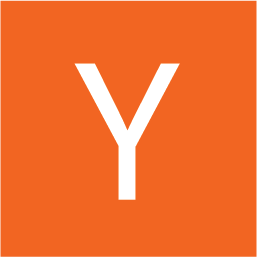
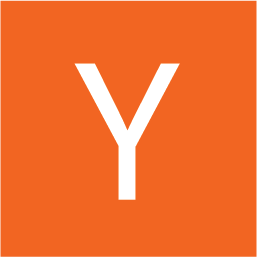

In [ ]:
import time

def fetch_ycombinator_companies():    
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    url = 'https://www.ycombinator.com/companies?industry=Real%20Estate%20and%20Construction'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
    }
    page = requests.get(url, headers=headers)
    print(f'page: {page.text}')
    
    # Wait for 5 seconds to ensure the page is fully loaded
    time.sleep(20)
    
    soup = BeautifulSoup(page.text, 'html.parser')
    print(f'soup: {soup.text}')
    company_names = []
    company_locations = []
    company_descriptions = []
    for company in soup.find_all('a', class_='_company_1pgsr_355'):
        company_name = company.find('span', class_='_coName_1pgsr_470').text
        print(f'Company Name: {company_name}')
        company_location = company.find('span', class_='_coLocation_1pgsr_486').text
        company_description = company.find('span', class_='_coDescription_1pgsr_495').text
        company_names.append(company_name)
        company_locations.append(company_location)
        company_descriptions.append(company_description)

    company_df = pd.DataFrame({
        'Company Name': company_names,
        'Company Location': company_locations,
        'Company Description': company_descriptions
    })
    company_df.to_csv(f"companies.csv", index=False)
    print(f"Saved to companies.csv")
fetch_ycombinator_companies()

In [3]:
pollution_url = 'https://aqicn.org/forecast/singapore/'
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
    }
pollution_page = requests.get(pollution_url, headers=headers)
pollution_page.text

'ï»¿<!doctype html><html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en" itemscope itemtype="http://schema.org/LocalBusiness" ng-app="waqi"> <head> <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /> <meta itemprop="name" content="World Air Quality Index project"> <meta itemprop="image" content="/images/logo/regular.png"> <meta name="author" content="The World Air Quality Index project" /> <meta name="apple-mobile-web-app-status-bar-style" content="black" /> <meta name="viewport" content="width=device-width"> <meta name="apple-mobile-web-app-capable" content="yes" /> <meta name="apple-mobile-web-app-status-bar-style" content="black-translucent" /> <title>Singapore Air Quality Forecast</title> <link rel="shortcut icon" href="/images/favicon.ico" /> <link rel="apple-touch-icon"  sizes="114x114"  href="/images/iOS/ico_114.png"/> <link rel="apple-touch-icon"  sizes="72x72"  href="/images/iOS/ico_72.png"/> <link rel="apple-touch-icon"  href="/images/iOS/ico_57

In [ ]:
pollution_soup = BeautifulSoup(pollution_page.text, 'html.parser')


In [4]:
dataset_id = "d_8f5fa022cbda68494fa70e788600505b"
url = "https://data.gov.sg/api/action/datastore_search?resource_id="  + dataset_id 
        
response = requests.get(url)
print(response.json())

{'help': 'https://data.gov.sg/api/3/action/help_show?name=datastore_search', 'success': True, 'result': {'resource_id': 'd_8f5fa022cbda68494fa70e788600505b', 'fields': [{'type': 'text', 'id': 'DataSeries'}, {'type': 'numeric', 'id': '2023'}, {'type': 'numeric', 'id': '2022'}, {'type': 'numeric', 'id': '2021'}, {'type': 'numeric', 'id': '2020'}, {'type': 'numeric', 'id': '2019'}, {'type': 'numeric', 'id': '2018'}, {'type': 'numeric', 'id': '2017'}, {'type': 'numeric', 'id': '2016'}, {'type': 'numeric', 'id': '2015'}, {'type': 'numeric', 'id': '2014'}, {'type': 'numeric', 'id': '2013'}, {'type': 'numeric', 'id': '2012'}, {'type': 'numeric', 'id': '2011'}, {'type': 'numeric', 'id': '2010'}, {'type': 'numeric', 'id': '2009'}, {'type': 'numeric', 'id': '2008'}, {'type': 'numeric', 'id': '2007'}, {'type': 'int4', 'id': '_id'}], 'records': [{'2007': '84', '2008': '80', '2009': '93', '2010': '104', '2011': '80', '2012': '98', '2013': '75', '2014': '83', '2015': '75', '2016': '61', '2017': '59'